In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random
import math

import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [36]:
n_nodes = 50
n_dofs = n_nodes*2
n_elements = n_nodes-1
x = np.linspace(0, 1, n_nodes)

In [37]:
#Element stiffnes matrix
k = np.matrix([[12, 6, -12, 6], [6, 4, -6, 2], [-12, -6, 12, -6], [6, 2, -6, 4]])*10/12

#Element mass matrix
m = np.matrix([[156, 22, 54, -13],[22, 4, 13, -3], [54, 13, 156, -22], [-13, -3, -22, 4]] )*1/420

In [38]:
#Global stiffness matrix
n_dofs = n_nodes*2
K = np.zeros([n_dofs, n_dofs])
for i in range(n_elements):
    K[2*i:2*i+4,2*i:2*i+4] += k
    
#Global mass matrix
M = np.zeros([n_dofs, n_dofs])
for i in range(n_elements):
    M[2*i:2*i+4,2*i:2*i+4] += m
    

In [39]:
#Force vector
F = np.zeros(n_dofs) 
F[-2] = 10 

In [40]:
#Initial conditions
dz0 = np.zeros(n_nodes)
dzt0 = np.zeros(n_nodes)

d0 = np.zeros(n_dofs)
dt0 = np.zeros(n_dofs)
d0[0:-1:2] = dz0

In [41]:
#Account for homogenous BC
F = F[2:]
K = K[2:,2:]
M = M[2:,2:]

In [42]:
from numpy.linalg import inv
import random

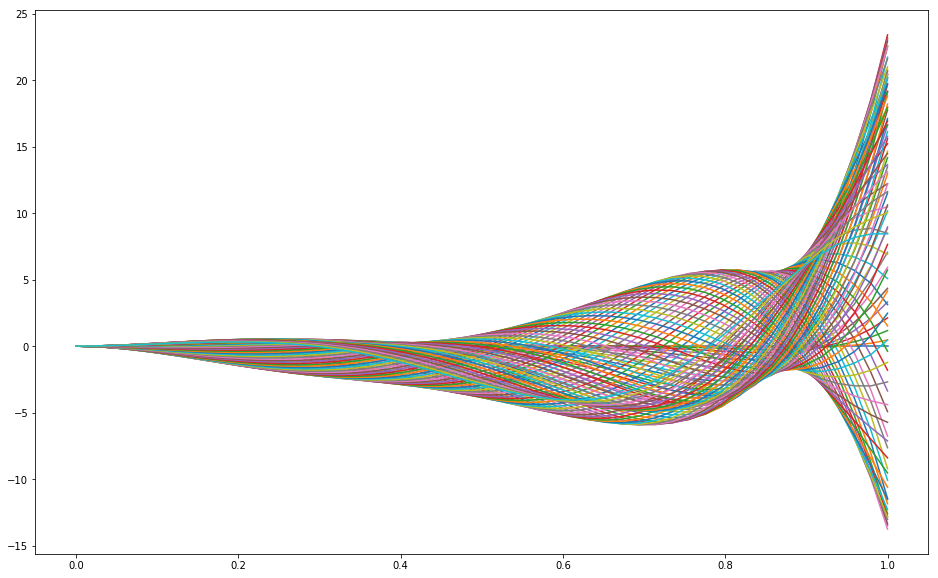

In [51]:
#Timestepping Theta Scheme
Theta = 1/2
d_i = d0[2:]

n_timesteps = 100000
#D = np.zeros([n_nodes, n_timesteps])
#D[:,0] = dz0

dt = 1/10

Minv = inv(M)
MinvK = np.matmul(Minv, K)
Q = inv(M + Theta*dt*K)
P = (M + (Theta - 1)*dt*K)
F = np.zeros(n_dofs) 
F = F[2:]
F_i = F

r_end = []
rt_end = []
f = []

plt.figure(figsize=(16,10))

for i in range(n_timesteps):
    
    #dt_i = -np.matmul(Minv, np.matmul(K,d_i)-F)
    fi = np.random.random()*np.sin(i*dt/1000)
    f.append(fi)
    
    F_i[-1] = fi
    
    d_i = np.matmul(Q, (np.matmul(P,d_i) + dt*F_i))
    dt_i = -MinvK*d_i + Minv*F_i
    
    dz = d_i[0:-1:2]
    dz = np.insert(dz,0,0)
    #dz = np.append(dz,0)
    
    r_end.append(dz[-1])
    rt_end.append(dt_i[-2])
    
    
    if i%1000 == 0:
        plt.plot(x, dz)
    
plt.show()

In [ ]:
#Training data

d = 10 #number of steps in "model memory"



In [ ]:
#Neural network


x_train = 

def baseline_model():
    model = Sequential()
    height = 200
    model.add(Dense(height, input_dim=n_nodes, activation='tanh', kernel_initializer='normal'))
    model.add(Dense(height, input_dim=height, activation='tanh', kernel_initializer='normal'))
    model.add(Dense(height, input_dim=height, activation='tanh', kernel_initializer='normal'))
    model.add(Dense(n_nodes, input_dim=height, activation='linear', kernel_initializer='normal'))
    
    model.compile(loss='mse', optimizer="adam")
    return model



# Training the model
model = baseline_model()
model.fit(np.transpose(x_train), np.transpose(y_train), epochs=500, verbose = 0)